In [4]:
import pandas as pd
import numpy as np


In [5]:
df = pd.read_csv("/content/tennis.csv")
df.head(5)

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [6]:
df.shape

(14, 5)

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = df.apply(le.fit_transform)
df.head(5)

,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1


In [8]:
x = df.drop('play',axis=1)
x.head(4)

,outlook,temp,humidity,windy
0,2,1,0,0
1,2,1,0,1
2,0,1,0,0
3,1,2,0,0


In [9]:
y = df.play
y.head(5)

,play
0,0
1,0
2,1
3,1
4,1


In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30)

In [11]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion="entropy", splitter="best")
classifier.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy')

In [12]:
y_pred = classifier.predict(x_test)

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.4

In [14]:
import matplotlib.pyplot as plt
from sklearn import tree

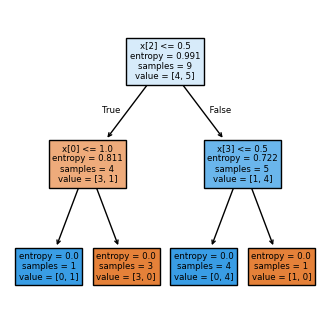

In [15]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=100)
tree.plot_tree(classifier, filled=True);
plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("/content/heart.csv")
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
df.shape

(303, 14)

In [18]:
x = df.drop('target',axis=1)
x.head(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2


In [19]:
y = df['target']
y.head(5)

,target
0,1
1,1
2,1
3,1
4,1


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, roc_curve, roc_auc_score

In [22]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred_log = logreg.predict(x_test)
#metrics
lr_acc_score = accuracy_score(y_test,y_pred_log)
lr_f1_score = f1_score(y_test,y_pred_log)
print("Accuracy Score: ",{lr_acc_score})
print("F1 Score: ",{lr_f1_score})
print("_"*30)
print("classification score")
print(classification_report(y_test,y_pred_log))

Accuracy Score:  {0.819672131147541}
F1 Score:  {0.8307692307692308}
______________________________
classification score
              precision    recall  f1-score   support

           0       0.85      0.77      0.81        30
           1       0.79      0.87      0.83        31

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [23]:
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)
y_pred_tree = tree.predict(x_test)
#metrics
lr_acc_score = accuracy_score(y_test,y_pred_log)
lr_f1_score = f1_score(y_test,y_pred_log)
print("Accuracy Score: ",{lr_acc_score})
print("F1 Score: ",{lr_f1_score})
print("_"*30)
print("classification score")
print(classification_report(y_test,y_pred_log))

Accuracy Score:  {0.819672131147541}
F1 Score:  {0.8307692307692308}
______________________________
classification score
              precision    recall  f1-score   support

           0       0.85      0.77      0.81        30
           1       0.79      0.87      0.83        31

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [24]:
model_ev = pd.DataFrame({'Model':['Logistic Regression','Decision Tree'],'Accuracy Score':[lr_acc_score,lr_acc_score],'F1 Score':[lr_f1_score,lr_f1_score]})
model_ev

,Model,Accuracy Score,F1 Score
0,Logistic Regression,0.819672,0.830769
1,Decision Tree,0.819672,0.830769


In [25]:
fpr_log, tpr_log, thresholds_log = roc_curve(y_test,y_pred_log)
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test,y_pred_tree)

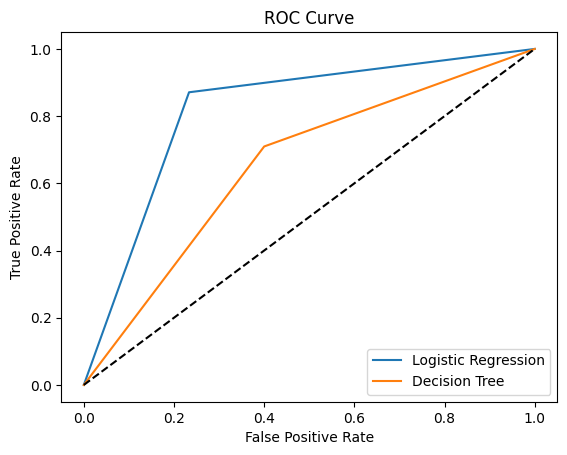

In [27]:
plt.plot(fpr_log,tpr_log,label='Logistic Regression')
plt.plot(fpr_tree,tpr_tree,label='Decision Tree')
plt.plot([0,1],[0,1],'k--')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()